# Bernoulli Distribution

In [9]:
import random
import numpy as np
from scipy.stats import bernoulli
%matplotlib inline
from matplotlib import pyplot as plt


## Distribution Function

设试验E只有两种可能的结果，这种试验称为伯努利试验。伯努利试验的结果为一个随机变量，它遵循伯努利分布。

伯努利分布也称为(0-1)分布,遵循伯努利分布的随机变量只有两种取值，分别用0和1表示（分别对应试验的两种结果）。典型的例子是扔硬币实验结果。将扔硬币的实验结果（正面向上或向下）看作是一个随机变量X，则X遵循伯努利分布，这是一种离散分布。记为$X \sim Bern(p)$或者$X \sim B(p)$。

假定用X=1表示正面向上，且出现正面朝上的概率为p，则伯努利分布的概率质量函数(PMF: Probability Mass Function，也有称为分布律的--如浙大版<<概率论与数理统计>>)为：

$$P(X=1|p)=p\\P(X=0|p)=1-p$$

当然，为了和条件概率区分开来，也有将$P(X=1|p)=p$写成$P(X=1;p)=p$的写法。一般情况下根据上下文也可以做出区分。

也可以记（未必简单，但是对于要做数学推导处理等就比较方便）为：
$$f(x) = P(X=x|p) = p^x\cdot(1-p)^{(1-x)}I_{{x\in(0,1)}}(x)$$

其中I(x)是所谓的Indicator函数。因此，以上式表示仅在x=0或x=1时成立，其它情况下则为0.

伯努利分布的概率分布函数（CDF: Cumulative Distribution Function）如下所示：...


## 常用统计特征
伯努利分布的几个常用的统计特征分别如下所示（注意，离散随机变量的统计特征计算不使用积分，而是用求和）：
$$E(X) = \sum_{x \in (0,1)}{xp^x\cdot(1-p)^{(1-x)}}=p$$
$$D(X) = \sum_{x \in (0,1)}{(x-E(X))^2p^x\cdot(1-p)^{(1-x)}}=p(1-p)$$
$$Skew(X) = \sum_{x \in (0,1)}{(\frac{x-E(X)}{\sigma})^3p^x\cdot(1-p)^{(1-x)}}=\frac{1-2p}{\sqrt{p(1-p)}}$$
$$Kurtosis(X) = \sum_{x \in (0,1)}{(\frac{x-E(X)}{\sigma})^4p^x\cdot(1-p)^{(1-x)}}-3=\frac{3p^2-3p+1}{p(1-p)}-3$$


## 代码示例

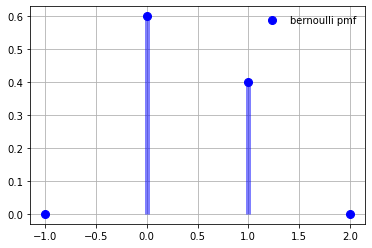

In [10]:
fig, ax = plt.subplots(1, 1)
p  = 0.4
x = np.arange(-1,3)
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

#rv = bernoulli(p)
#ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
ax.grid()
plt.show()

Check the inter-inverse relation between cdf and ppf:

注意存在在不满足可逆条件的区间。cdf(2) = 1, 而ppf(1) = 1。这是可以理解的。因为对于在x>=1的区间，cdf的定义域到值域不是一一映射，因此不可逆。所以ppf(cdf(x))不一定等于x。

In [11]:
cdf_prob = bernoulli.cdf(x, p)
print('cdf_prob[{0}] = {1}'.format(x,cdf_prob))
print('ppf[{0}] = {1}'.format(cdf_prob,bernoulli.ppf(cdf_prob, p)))

cdf_prob[[-1  0  1  2]] = [0.  0.6 1.  1. ]
ppf[[0.  0.6 1.  1. ]] = [-1.  0.  1.  1.]


4种常用的统计特征:

In [12]:
p=0.5
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print('Bernoulli distribution with p ={}'.format(p))
print('mean = {0}, var = {1}, skew = {2}, kurt = {3}'.format(mean, var, skew, kurt))

p=0.4
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print('Bernoulli distribution with p ={}'.format(p))
print('mean = {0}, var = {1}, skew = {2}, kurt = {3}'.format(mean, var, skew, kurt))

Bernoulli distribution with p =0.5
mean = 0.5, var = 0.25, skew = 0.0, kurt = -2.0
Bernoulli distribution with p =0.4
mean = 0.4, var = 0.24, skew = 0.40824829046386296, kurt = -1.8333333333333337


当p=0.5时，说明0和1是等概率的，因此是一个对称的分布，因此3阶中心矩(对应Skewness)变为0。p!=0.5时，分布变为非对称的了，skewness变为非0就显示了分布非对称性。

histogram() parameter: densitybool, optional
If False, the result will contain the number of samples in each bin. If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are chosen; it is not a probability mass function.

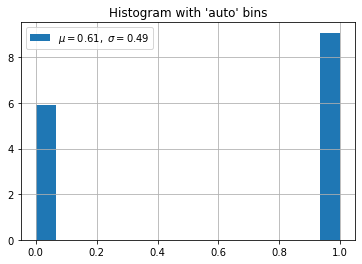

sample means    of r = 0.6053
sample variance of r = 0.2389119100000001
sample std-dev  of r = 0.4887861597876929


In [14]:
n_experiment = 10000
p = 0.6
r = bernoulli.rvs(p, size=n_experiment)
u, s = np.mean(r), np.std(r)
_ = plt.hist(r, bins='auto', density=True, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.legend()
plt.savefig('graph/bernoulli.png')

plt.grid()
plt.show()

print('sample means    of r = {0}'.format(np.mean(r)))
print('sample variance of r = {0}'.format(np.var(r)))
print('sample std-dev  of r = {0}'.format(np.std(r)))
